## Data storytelling & business thinking

This analysis is framed for business stakeholders responsible for revenue and operational decisions. The focus is on clarity, trends, and actionable differences rather than technical methodology.

**Business Question**

- Where should leadership focus attention to drive revenue growth based on observed sales patterns?

**Supporting Questions**

- How has overall sales performance evolved over time, and is growth consistent or volatile?

- Which cities and products meaningfully contribute to revenue versus those with marginal impact?

- How concentrated is revenue, and does this create dependency or risk?

### Narrative Arc

- Start with overall sales behavior over time

- Identify periods of growth or instability

- Narrow focus to geographic contributors

- Highlight concentration patterns

- Translate findings into business implications

## Sales Trend Over Time

This visualization should show how total sales evolve over time to assess growth stability and potential volatility.

In [5]:
# Data overview
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv') # This is the cleaned dataset from week 5 & 6

df.dtypes

df["Order Date"] = pd.to_datetime(df["Order Date"])

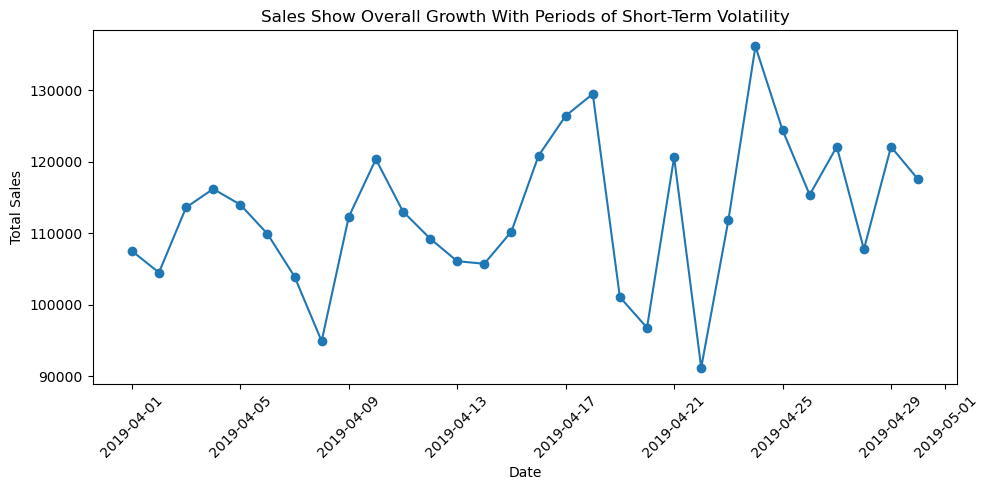

In [6]:
# aggregate sales by date
sales_trend = (
    df.groupby(df['Order Date'].dt.date)['Sales']
      .sum()
      .reset_index()
)

# visualize sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(sales_trend['Order Date'], sales_trend['Sales'], marker='o')
plt.title('Sales Show Overall Growth With Periods of Short-Term Volatility')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*Sales growth appears to be driven by intermittent high-revenue days rather than a smooth upward trend. This pattern suggests potential dependence on specific events, promotions, or seasonal demand. Leadership may want to investigate what drives these peaks and assess whether revenue can be stabilized by strengthening baseline daily sales performance.*

## Geographic contribution

This chart should answer the question "Where is the money really coming from?" 
so i'll be identifying:

- Which cities matter

- Which are noise

- Which represent risk or opportunity

This helps to direct how resources are allocated, sales focus and operational prioritization.

In [8]:
# aggregate sales by city.

city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

city_sales

City
San Francisco    812423.20
Los Angeles      550099.08
New York City    446487.79
Boston           352764.39
Atlanta          284442.93
Seattle          275860.24
Dallas           250760.48
Portland         239978.12
Austin           172683.59
Name: Sales, dtype: float64

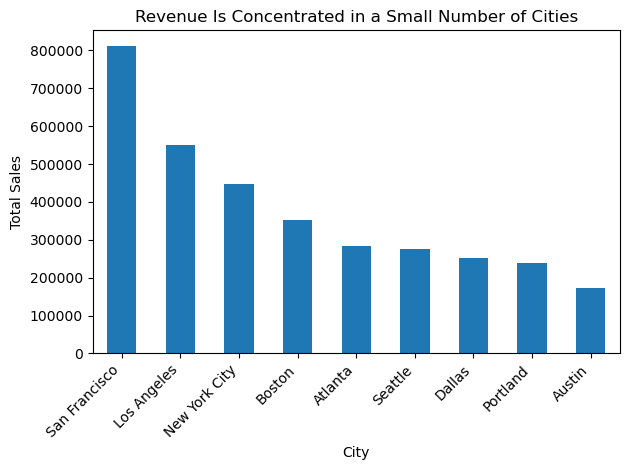

In [12]:
# visualize city sales

import matplotlib.pyplot as plt

city_sales.plot(kind='bar')
plt.title('Revenue Is Concentrated in a Small Number of Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Revenue contribution is uneven across cities, with a small number of locations accounting for a disproportionate share of total sales. This concentration suggests that overall performance is highly sensitive to outcomes in these key markets. Leadership may want to prioritize retention and growth strategies in high-performing cities while assessing whether underperforming locations represent untapped potential or structural limitations.*

## Revenue concentration & business risk

This section assesses how stable our revenue structure is, based on the principle that diverse income streams are more reliable than relying on just a few sources.

In [13]:
# Calculate each city’s share of total revenue

city_share = city_sales / city_sales.sum()

city_share.sort_values(ascending=False)

city_share

City
San Francisco    0.239971
Los Angeles      0.162487
New York City    0.131882
Boston           0.104199
Atlanta          0.084018
Seattle          0.081483
Dallas           0.074069
Portland         0.070884
Austin           0.051007
Name: Sales, dtype: float64

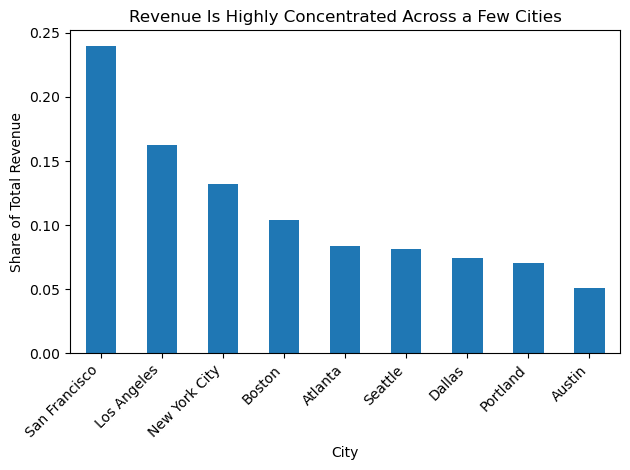

In [15]:
# Visualize city share

city_share.plot(kind='bar')
plt.title('Revenue Is Highly Concentrated Across a Few Cities')
plt.xlabel('City')
plt.ylabel('Share of Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*A significant portion of total revenue is concentrated in a small number of cities, increasing exposure to localized risks such as demand shocks, operational disruptions, or competitive pressures in those markets. While high-performing cities represent clear strengths, the current revenue structure suggests limited diversification. Leadership may want to explore strategies to both protect key markets and gradually reduce concentration risk by strengthening secondary locations.*